In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [6]:
# Функция для генерации данных
def gen_sinusoidal(timesteps, amp, freq, noise):
    X = np.arange(timesteps)
    e = np.random.normal(0,noise, (timesteps,))
    y = amp*np.sin(X*(4*np.pi/freq))+e
    return y

def gen_randomwalk(timesteps, noise):
    y = np.random.normal(0,noise, (timesteps,))
    return y.cumsum()

# Добавляем сезонность
def gen_ts(timesteps, random_state=0):
#     np.random.seed(i)
    seas1 = gen_sinusoidal(timesteps=timesteps, amp=10, freq=24, noise=4)
    seas2 = gen_sinusoidal(timesteps=timesteps, amp=10, freq=24*7, noise=4)
#     rw = gen_randomwalk(timesteps=timesteps, noise=1)
#     Можно добавить тренд
#     X = np.linspace(0,10, timesteps).reshape(-1,1)
#     X = np.power(X, [1,2])
#     trend = LinearRegression().fit(X, rw).predict(X)
    return seas1 + seas2
wave = gen_ts(2000)

In [7]:
import statistics
variance=statistics.variance(wave)
variance

129.36036003630662

In [8]:
wave[500:560] = 0
wave[1250:1255] = -20
wave[1500:1505] = 50 
wave[1680:1685] = 40
wave[235:240] = 40

Text(0.5, 1.0, 'Сгенерированные данные')

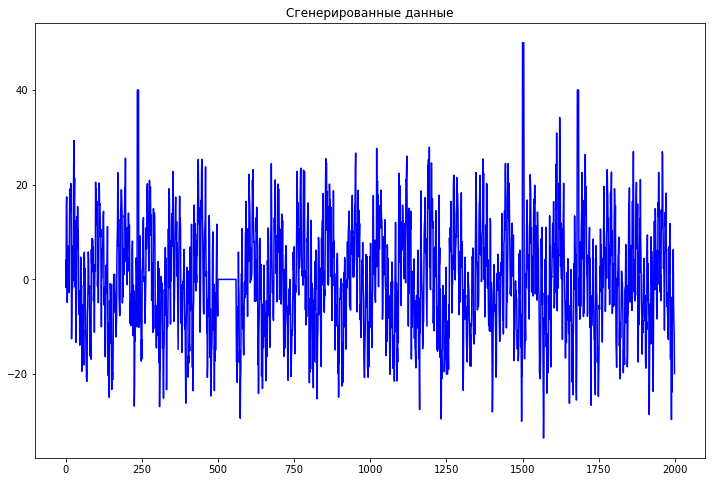

In [9]:
# wave.sample(n=1, random_state=0, axis=1).plot(legend=False, figsize=(16,6))
plt.figure(figsize=(12,8))
plt.plot(wave, color="blue")
# plt.plot(wave1, color="blue")
plt.title('Сгенерированные данные')